Mini projet
Implementer le modèle LeNet et AlexNet et faire une comparaison des deux termes de LOSS et Accuracy.

/!\ Faites attention à la taille des inputs !!!!

Bon courage


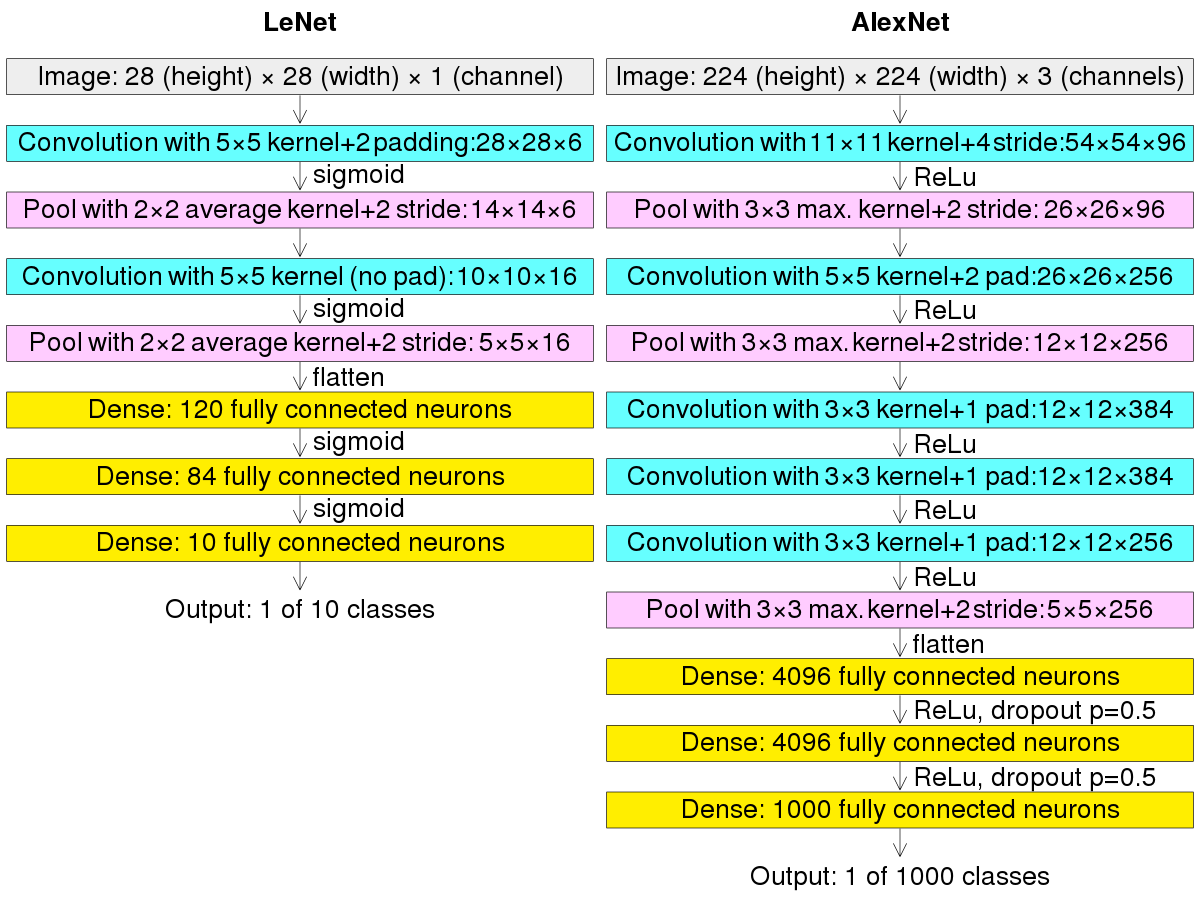


Travail sur **AlexNet**

Importation des libreries python

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from PIL import Image
import warnings
from PIL import Image
import zipfile
import tensorflow_hub as hub
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')
np.random.seed(0)
tf.random.set_seed(0)

Importation de nos donnees GTSRB 

importaion de mon drive 

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


 importation de fichiers CSV 

In [4]:

from google.colab import files 
files.upload()

Output hidden; open in https://colab.research.google.com to view.

Importation des images 

In [ ]:
#importation des images: Mata, Train et Test 
%%time
from zipfile import ZipFile
file_name = files.upload()

Saving Meta.zip to Meta.zip
Saving Test.zip to Test.zip
Saving Train.zip to Train.zip


Dézipper les fichiers(extraction)

In [9]:
%%time
with zipfile.ZipFile("Meta.zip","r") as zip_ref:
        zip_ref.extractall("")
        
with zipfile.ZipFile("Train.zip","r") as zip_ref:
        zip_ref.extractall("")

with zipfile.ZipFile("Test.zip","r") as zip_ref:
        zip_ref.extractall("")

CPU times: user 9.18 s, sys: 5.56 s, total: 14.7 s
Wall time: 15.8 s


Preparation des données training validation et labels

Chemin d'accés du fichier

In [10]:
path = "/content/"

In [11]:
meta = os.listdir(path+'Meta')
meta

['37.png',
 '3.png',
 '40.png',
 '32.png',
 '14.png',
 '30.png',
 '41.png',
 '20.png',
 '29.png',
 '19.png',
 '42.png',
 '10.png',
 '33.png',
 '28.png',
 '25.png',
 '2.png',
 '26.png',
 '5.png',
 '9.png',
 '16.png',
 '11.png',
 '4.png',
 '13.png',
 '21.png',
 '8.png',
 '12.png',
 '6.png',
 '23.png',
 '17.png',
 '27.png',
 '22.png',
 '18.png',
 '7.png',
 '36.png',
 '24.png',
 '39.png',
 '15.png',
 '0.png',
 '1.png',
 '31.png',
 '34.png',
 '38.png',
 '35.png']

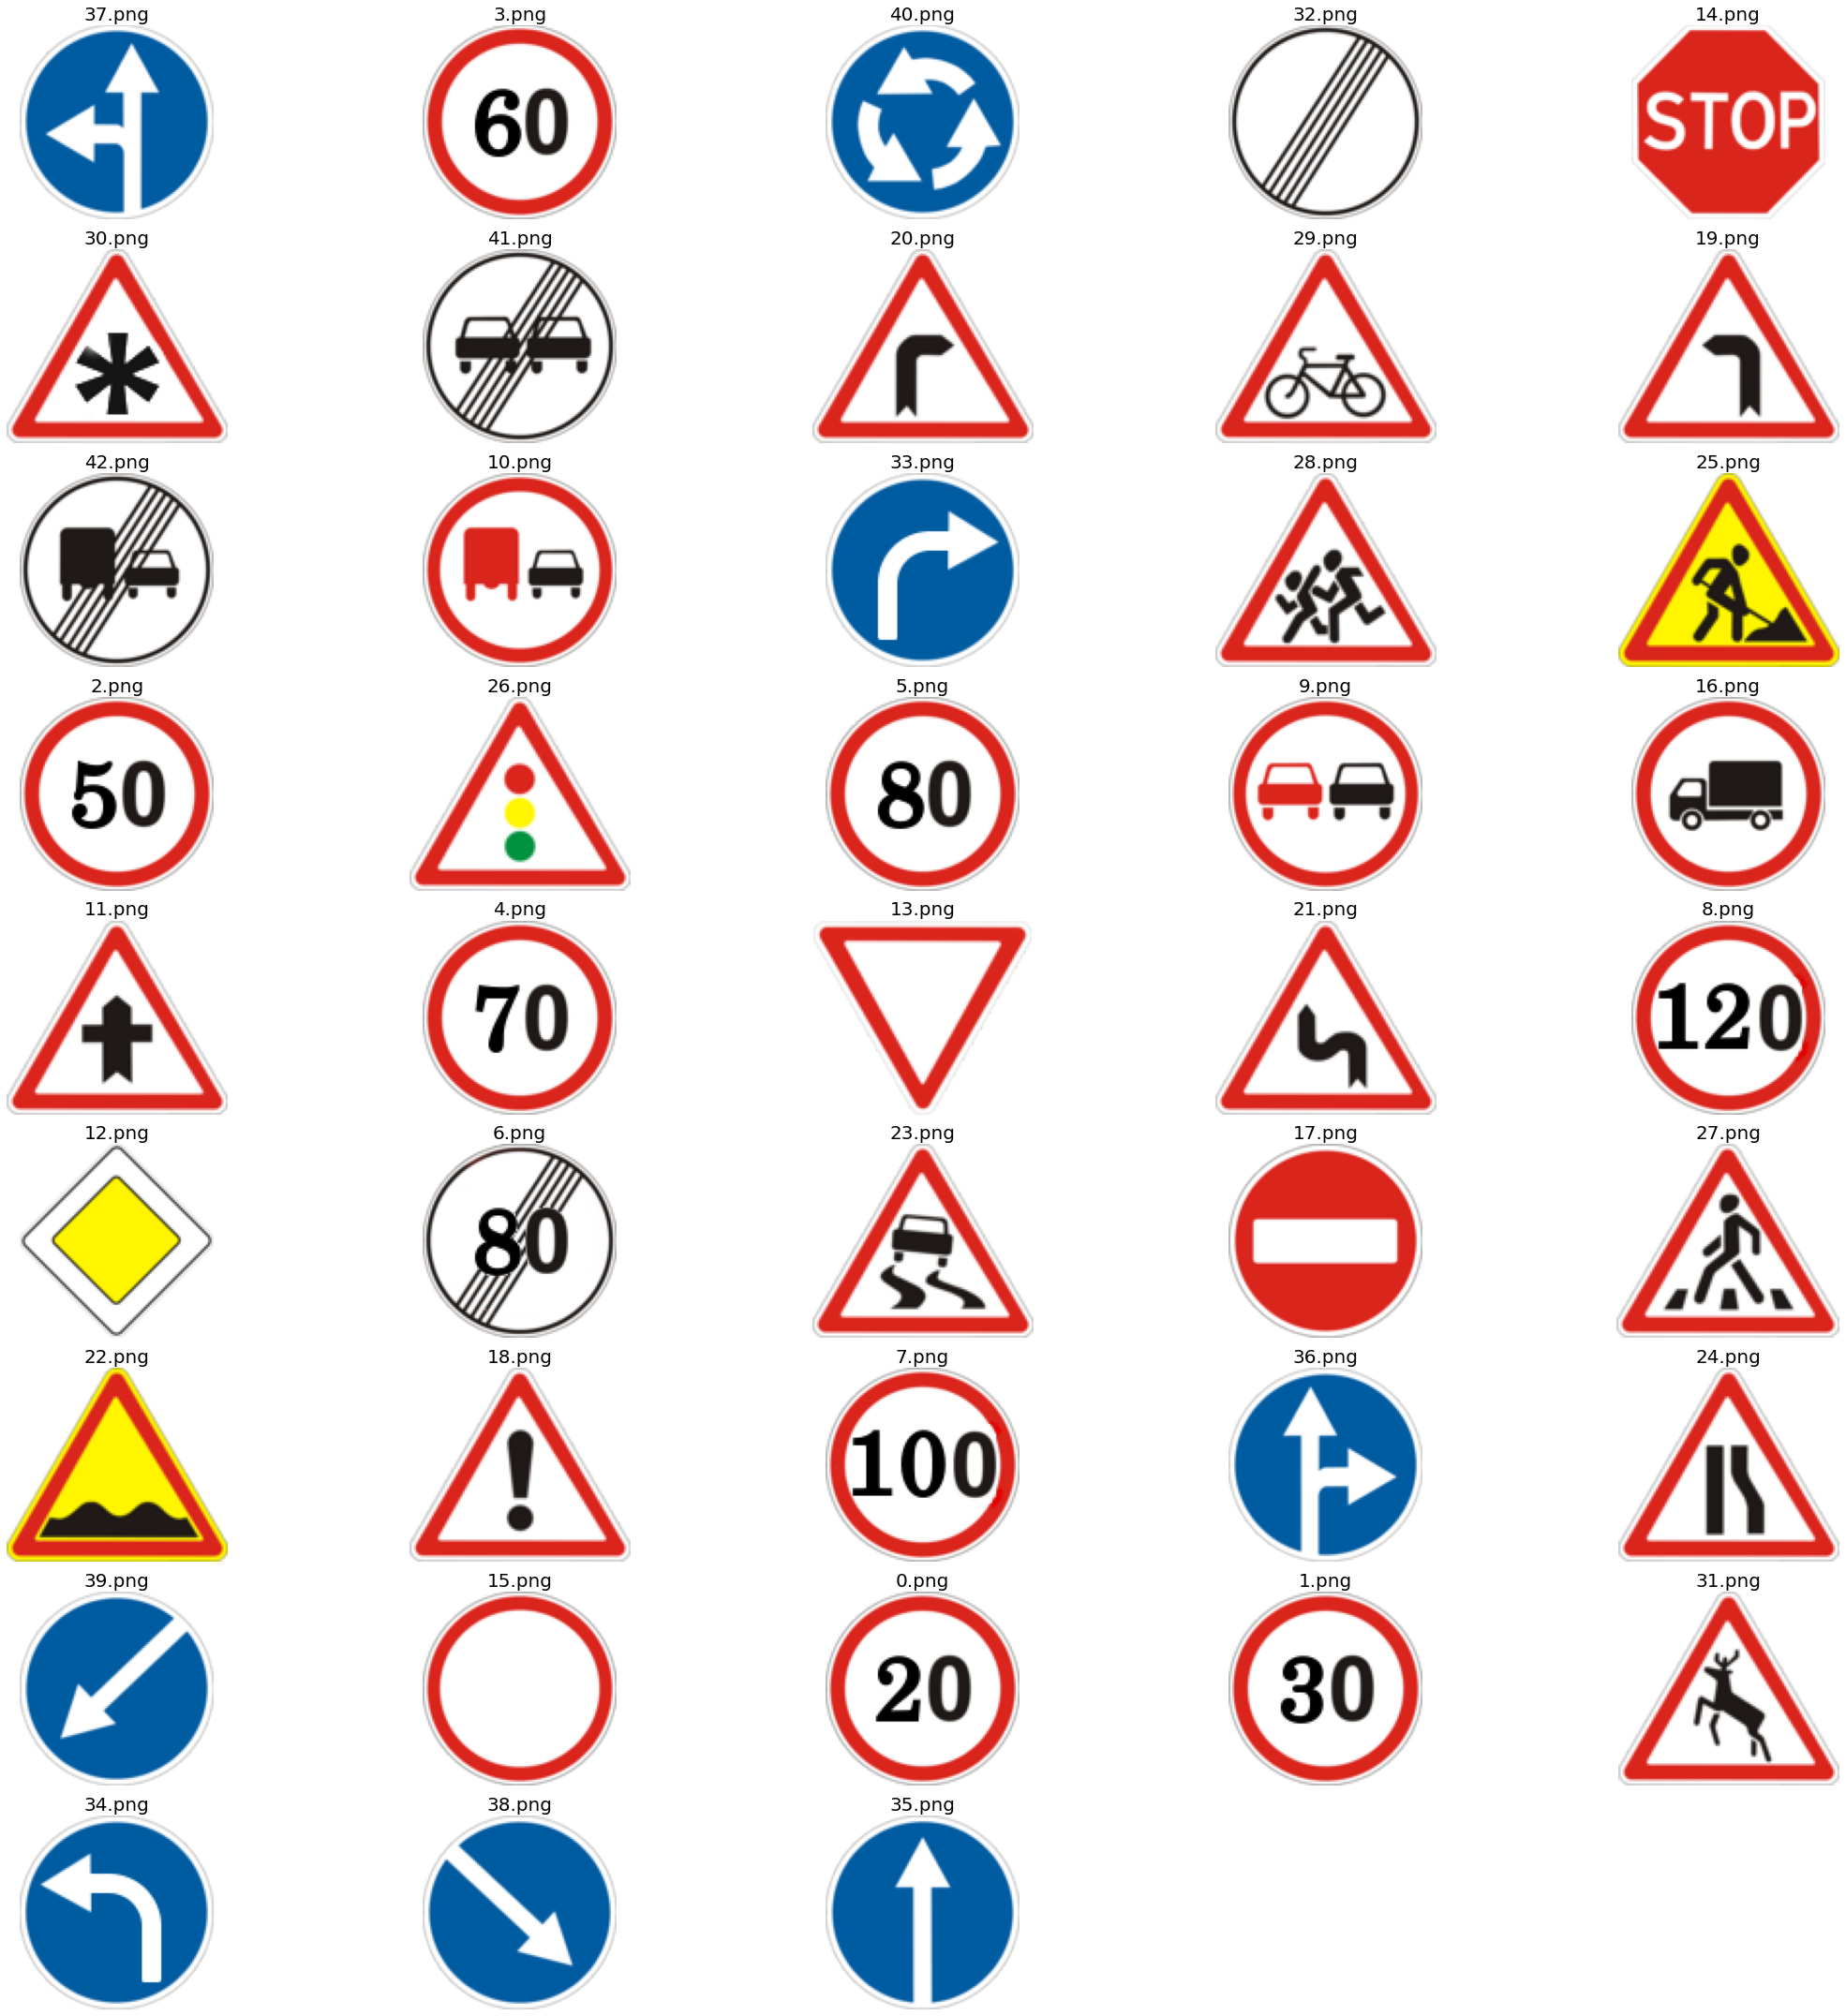

In [12]:
plt.figure(figsize=(30,30))
for i, file in enumerate(meta):
    img = Image.open(path+'Meta/'+file)
    ax = plt.subplot(9,5,i+1)
    ax.imshow(img)
    ax.set_title(file, size=20)
    plt.axis('off')
plt.tight_layout()

Connaissance de mon chemin de travail

In [13]:
%pwd  # Pour la localisation du fichier 

'/content'

Création dictionnaire de classe 

In [14]:
## Creating a dictionary for class labels

classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [15]:
train_df =pd.read_csv(path +"Train.csv")
train_df.head

<bound method NDFrame.head of        Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0         27      26       5       5      22      20       20   
1         28      27       5       6      23      22       20   
2         29      26       6       5      24      21       20   
3         28      27       5       6      23      22       20   
4         28      26       5       5      23      21       20   
...      ...     ...     ...     ...     ...     ...      ...   
39204     52      56       5       6      47      51       42   
39205     56      58       5       5      51      53       42   
39206     58      62       5       6      53      57       42   
39207     63      69       5       7      58      63       42   
39208     68      69       7       6      62      63       42   

                                 Path  
0      Train/20/00020_00000_00000.png  
1      Train/20/00020_00000_00001.png  
2      Train/20/00020_00000_00002.png  
3      Train/20/00020_00000_0

In [16]:
train_df.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


Prétraitement

In [17]:
print(f'minimum width: {train_df.Width.min()}')
print(f'minimum height: {train_df.Height.min()}')
print(f'average width: {train_df.Width.mean()}')
print(f'average height: {train_df.Height.mean()}')

minimum width: 25
minimum height: 25
average width: 50.83587951745773
average height: 50.328929582493814


In [18]:
train_x =[]
for i in train_df.Path:
    img = Image.open(path+i)       # reading image
    img = img.resize((50,50))     # reasizing image
    train_x.append(np.array(img)) # saving image as array to train

train_y = np.array(train_df.ClassId)
train_x = np.array(train_x)
print(train_x.shape)
print(train_y.shape)

(39209, 50, 50, 3)
(39209,)


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
test_df =pd.read_csv(path +"Test.csv")
test_x =[]
for i in test_df.Path:
    img = Image.open(path+i)
    img = img.resize((50,50))
    test_x.append(np.array(img))

test_y = np.array(test_df.ClassId)
test_x = np.array(test_x)
print(test_x.shape)
print(test_y.shape)

(12630, 50, 50, 3)
(12630,)


In [23]:
test_df = pd.read_csv(path+'Test.csv')
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [24]:
test_x =[]
for i in test_df.Path:
    img = Image.open(path+i)
    img = img.resize((50,50))
    test_x.append(np.array(img))

test_y = np.array(test_df.ClassId)
test_x = np.array(test_x)
print(test_x.shape)
print(test_y.shape)

(12630, 50, 50, 3)
(12630,)


Dangerous curve right


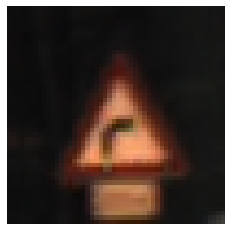

In [26]:
print(classes[train_y[35]])
plt.imshow(train_x[35])
plt.axis('off')
plt.show()

## Normalization

In [27]:


xtrain = train_x/255
xtest = test_x/255


ytrain = keras.utils.to_categorical(train_y)
ytest = keras.utils.to_categorical(test_y)



Création d'un modèle CNN

In [28]:
from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(xtrain, ytrain, test_size=0.2, random_state=0)
print(xtrain.shape)
print(xvalid.shape)
print(ytrain.shape)
print(yvalid.shape)

(31367, 50, 50, 3)
(7842, 50, 50, 3)
(31367, 43)
(7842, 43)


In [29]:
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

model = keras.models.Sequential()
model.add(Conv2D(filters=96, kernel_size= (11,11), strides=4, activation='relu', padding='same', input_shape=(50,50,3)))
model.add(Conv2D(filters=96, kernel_size=(11,11), strides=4, activation='relu', padding='same'))
model.add(MaxPool2D((2,2), padding='valid'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=(5,5), strides=1, activation='relu', padding='same' ,input_shape=(50,50,3)))
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=1, activation='relu', padding ='same'))
model.add(MaxPool2D((2,2), padding='valid'))
model.add(Dropout(0.5))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=1, activation='relu', padding = 'same'))
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=1, activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=1, activation='relu', padding='same'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(43, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 96)        34944     
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 96)          1115232   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 96)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 2, 2, 96)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 256)         614656    
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 256)         1638656   
                                                        

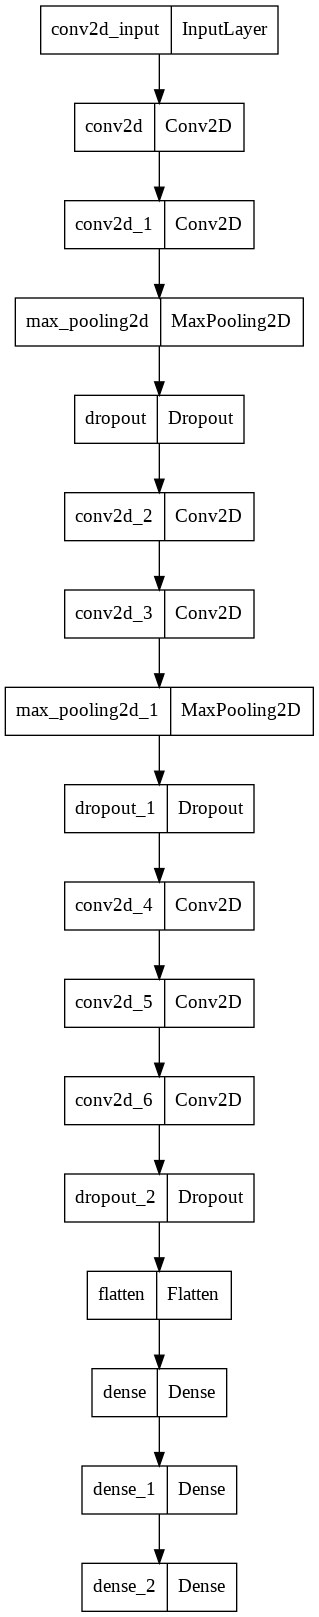

In [30]:
keras.utils.plot_model(model)


In [31]:
# Compiling the CNN model
model.compile(optimizer='sgd',
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
## Fitting the model, with early stopping callback
%%time
earlystop_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights =True)

model_history = model.fit(xtrain,ytrain, epochs=50,
                         validation_data=(xvalid,yvalid),
                         callbacks=[earlystop_cb])

Epoch 1/50
981/981 [==============================] - 930s 946ms/step - loss: 3.6278 - accuracy: 0.0550 - val_loss: 3.5198 - val_accuracy: 0.0570
Epoch 2/50
981/981 [==============================] - 1067s 1s/step - loss: 3.4949 - accuracy: 0.0568 - val_loss: 3.4927 - val_accuracy: 0.0570
Epoch 3/50
981/981 [==============================] - 991s 1s/step - loss: 3.4860 - accuracy: 0.0556 - val_loss: 3.4914 - val_accuracy: 0.0569
Epoch 4/50
981/981 [==============================] - 1128s 1s/step - loss: 3.4855 - accuracy: 0.0562 - val_loss: 3.4907 - val_accuracy: 0.0570
Epoch 5/50
981/981 [==============================] - 965s 984ms/step - loss: 3.4854 - accuracy: 0.0574 - val_loss: 3.4912 - val_accuracy: 0.0570
Epoch 6/50
981/981 [==============================] - 917s 935ms/step - loss: 3.4855 - accuracy: 0.0549 - val_loss: 3.4910 - val_accuracy: 0.0559
Epoch 7/50
981/981 [==============================] - 898s 915ms/step - loss: 3.4855 - accuracy: 0.0559 - val_loss: 3.4907 - val_ac

In [ ]:
model.save('model_with_padding.h5')

In [ ]:
pd.DataFrame(model_history.history).plot()

Evaluating model performance and making predictions of model

In [ ]:
## Évaluation du modèle

loss, accuracy = model.evaluate(xtest,ytest)
print(f'Loss = {loss:.2f}\naccuracy = {accuracy*100:.2f}%')

In [ ]:
## Making predictions

prob = model.predict(xtest)
pred = np.argmax(prob, axis=-1)

In [ ]:
# print(prob[1])
plt.figure(figsize=(30,30))
for i in range(50):
    ax = plt.subplot(5,10,i+1)
    ax.imshow(xtest[i])
    ax.set_title(f'predicted: {classes[pred[i]]}\nactual:{classes[test_y[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

**Un 2ème Modèle sans padding**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D,BatchNormalization

In [ ]:
model2 = Sequential([
    Conv2D(96, (11,11), activation='relu', input_shape=(50,50,3)),
    Conv2D(96, (11,11)),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    MaxPool2D(2,2),
    Dropout(0.2),
    Conv2D(256, (5,5), activation='relu'),
    Conv2D(256, (5,5)),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    MaxPool2D(2,2),
    #Dropout(0.2),
    Conv2D(384, (3,3), activation='relu'),
    Conv2D(384, (3,3)),
    Conv2D(256, (3,3)),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    MaxPool2D(2,2),
    Dropout(0.2),
    Flatten(),
    Dense(256),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Dropout(0.4),
    Dense(43, activation='softmax')
])

In [ ]:
model2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [ ]:
model2.summary()

In [ ]:
epochs = 15
history = model2.fit(
    xtrain,
    ytrain,
    batch_size=32,
    epochs=epochs,
    validation_data=(xvalid,yvalid)
)

In [ ]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

plt.plot(acc, 'r', label='Training accuracy')
plt.plot(val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(loss, 'r', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()

In [ ]:
loss2, accuracy2 = model2.evaluate(xtest,ytest)
print(f'Loss = {loss2:.2f}\naccuracy = {accuracy2*100:.2f}%')

Un 3ème Modèle 

In [ ]:

model3 = keras.models.Sequential([
keras.layers.Conv2D(filters=96, kernel_size= (11,11), strides=4, activation='relu', padding='same', input_shape=(50,50,3)),
keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=4, activation='relu', padding='same'),
keras.layers.MaxPoool2D(pool_size=(2,2)),
keras.layers.BatchNormalization(axis=-1),



keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=1, activation='relu', padding='same' ,input_shape=(50,50,3)),
keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=1, activation='relu', padding ='same'),
keras.layers.MaxPoool2D(pool_size=(2,2)),
keras.layers.BatchNormalization(axis=-1),

keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=1, activation='relu', padding = 'same'),
keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=1, activation='relu', padding='same'),
keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=1, activation='relu', padding='same'),
keras.layers.BatchNormalization(axis=-1),

keras.layers.Flatten(),
keras.layers.Dense(4096, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(rate=0.5),

keras.layers.Dense(43, activation='softmax')

])

In [ ]:
model3.summary()

In [ ]:
from tensorflow.keras.optimizers import Adam
lr = 0.003
epochs =30


opt = Adam(lr=lr, dacay=lr / (epochs * 0.5))
model3.compile(loss='categorical_crossentropy',optimizer=opt , metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(
      rotation_range=10,
      zoom_range=0.15,
      width_shift_range=0.1,
      heigth_shift_range=0.1,
      shear_range=0.15,
      horizontal_flip=False,
      vertical_flip=False,
      fill_mode='nearest')


 

In [ ]:
 history3 = model3.fit(aug.flow(xtrain,
                                 ytrain,
                                 batch_size=32),
                        epochs=epochs,
                        validation_data=(xvalid,yvalid))

In [ ]:
pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_yline(0,1)
plt.show()

Travail sur **LeNet**

